In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

In [3]:
from PIL import Image
from tqdm import tqdm

#### **Load the Data**

https://www.kaggle.com/datasets/jcprogjava/handwritten-digits-dataset-not-in-mnist

A collection of 107,730 digits in 28x28 PNG format.

In [4]:
dataset_path = 'dataset'
images = []
labels = []

for dir in os.listdir(dataset_path):
    dir_path = os.path.join(dataset_path, dir, dir)
    if os.path.isdir(dir_path):
        for file in tqdm(os.listdir(dir_path)):
            file_path = os.path.join(dir_path, file)
            image = Image.open(file_path)
            background = Image.new('RGB', image.size, (255, 255, 255))
            background.paste(image, mask=image.split()[3])
            img_gray = background.convert('L')
            img = np.array(img_gray)
            images.append(img)
            labels.append(int(dir))

  0%|          | 0/10773 [00:00<?, ?it/s]

100%|██████████| 10773/10773 [02:43<00:00, 65.78it/s]


In [5]:
images  = np.array(images)
labels = np.array(labels)

In [24]:
# np.save('images.npy', images)
# np.save('labels.npy', labels)

In [ ]:
# Optional if Loading of Images takes too long

images = np.load('images.npy')
labels = np.load('labels.npy')

In [5]:
images.shape

(107730, 28, 28)

In [6]:
len(labels)

107730

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, random_state=42, test_size=0.33)

In [8]:
print(f"X_train : {len(X_train)}, y_train : {len(y_train)}")
print(f"X_test : {len(X_test)}, y_test : {len(y_test)}")

X_train : 72179, y_train : 72179
X_test : 35551, y_test : 35551


**Visualizations**

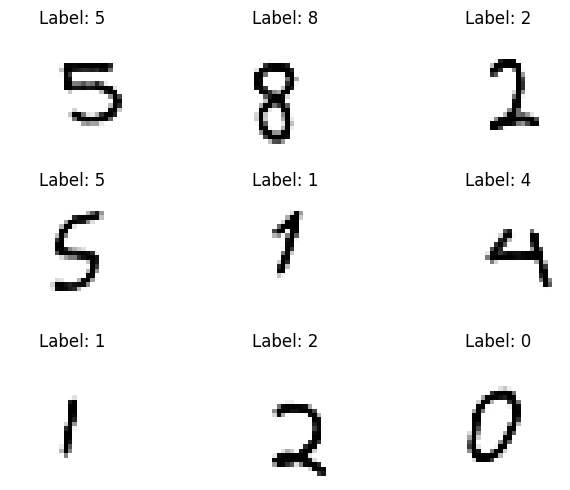

In [9]:
import random

plt.figure(figsize=(7, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    rand = random.randint(0, len(X_train))
    plt.imshow(X_train[rand].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[rand]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

#### **Data Preprocessing**

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#### **Model Building**

In [12]:
model = Sequential([
    Flatten(input_shape=(28,28)),       # Input Layer : Takes the 28x28 array and flattens it
    # tf.keras.Input(shape=(28,28)),
    Dense(units=128, activation="relu",name = 'layer1'),   # Hidden layer
    Dense(units=64, activation="relu",name = 'layer2'),   # Hidden layer
    Dense(units=32, activation="relu",name = 'layer3'),   # Hidden layer
    Dense(units=10, activation="softmax",name = 'layer4')  # Output Layer
])

C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer4 (Dense)                  │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

In [15]:
print(type(X_train), X_train.dtype)
print(type(y_train), y_train.dtype)


<class 'numpy.ndarray'> float64
<class 'numpy.ndarray'> int32


#### **Model Training**

In [16]:
model.fit(X_train, y_train, epochs=10,)

Epoch 1/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3675 - loss: 1.7265
Epoch 2/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8672 - loss: 0.3913
Epoch 3/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9393 - loss: 0.1796
Epoch 4/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9563 - loss: 0.1246
Epoch 5/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9721 - loss: 0.0850
Epoch 6/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9782 - loss: 0.0629
Epoch 7/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9856 - loss: 0.0440
Epoch 8/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9808 - loss: 0.0689
Epoch 9/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9839 - loss: 0.0472
Epoch 10/10
2256/2256 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9886 - loss: 0.0325


#### **Model Testing**

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

print("Test Accuracy :",test_acc)
print("Test Loss :", test_loss)

1111/1111 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9932 - loss: 0.0202
Test Accuracy : 0.9932491183280945
Test Loss : 0.020985940471291542


In [18]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=1)

print("Test Accuracy :",train_acc)
print("Test Loss :", train_loss)

2256/2256 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.9938 - loss: 0.0180
Test Accuracy : 0.9936823844909668
Test Loss : 0.018433745950460434


#### **Saving Model**

In [19]:
model.save("HandWrittenDigitsClassfication.h5")

#### **Loading Model and Sample Prediction**

In [10]:
from tensorflow.keras.models import load_model


model = load_model("HandWrittenDigitsClassfication.h5")

In [18]:
sample_images = []

for file in os.listdir('sample'):
    file_path = os.path.join('sample', file)
    image = Image.open(file_path)
    image = image.convert('L')
    image = image.resize((28, 28))
    img = np.array(image)
    sample_images.append(img)
    
sample_images = np.array(sample_images)

In [19]:
sample_images.shape

(10, 28, 28)

In [20]:
sample_images = sample_images/255.0

In [21]:
predictions = model.predict(sample_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [22]:
class_names = [0,1,2,3,4,5,6,7,8,9]
predicted_classes = []
for prediction in predictions:
    predicted_classes.append(class_names[np.argmax(prediction)])
    
predicted_classes

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

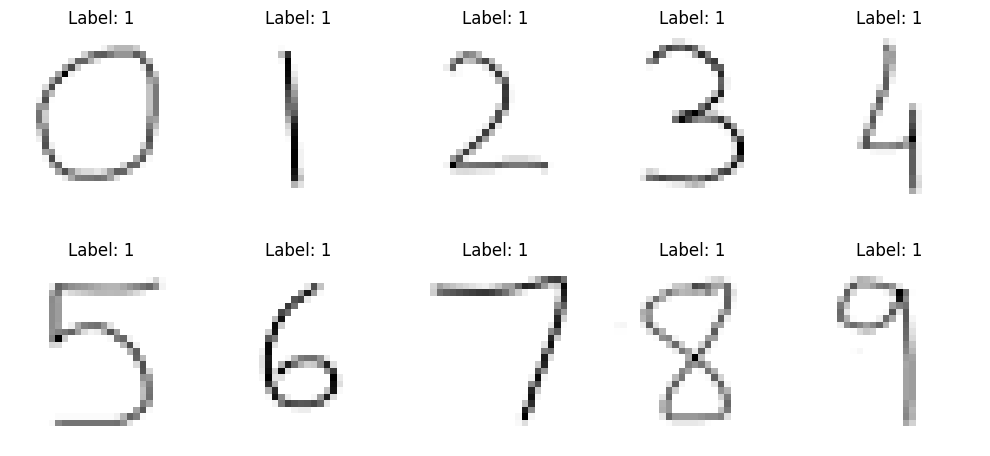

In [23]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')
    plt.title(f"Label: {predicted_classes[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()